# Librerias

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator#, #load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score,f1_score

from keras.layers.core import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import json

# Image Definition and some Model compositions for a  Deep Learning Model

In [73]:
IMAGE_WIDTH=332
IMAGE_HEIGHT=332
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 64
EPOCHS = 40

# Loading Datas 

In [126]:
os. getcwd()
os.chdir('d://Bootcamp_22//NUWE//Zero_deforestation_mission')             # Confirm correct path for working

In [127]:
ROOT_PATH = os.getcwd()                                         # Selecting PATH where the training images are
TRAIN_PATH = ROOT_PATH + "\\Data\\" 
TRAIN_PATH

'd:\\Bootcamp_22\\NUWE\\Zero_deforestation_mission\\Data\\'

In [128]:
ROOT_PATH = os.getcwd()                                     # Selecting PATH where the testing images are
TEST_PATH = ROOT_PATH + "\\Data\\" 
TEST_PATH

'd:\\Bootcamp_22\\NUWE\\Zero_deforestation_mission\\Data\\'

In [10]:
train_set = pd.read_csv("Data/train.csv")                 # Loading train
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB


In [16]:
test_set = pd.read_csv("Data/test.csv")                 # Loading test
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      635 non-null    float64
 1   longitude     635 non-null    float64
 2   year          635 non-null    int64  
 3   example_path  635 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 20.0+ KB


In [11]:
train_set.describe()

,label,latitude,longitude,year
count,1714.000000,1714.000000,1714.000000,1714.000000
mean,0.882147,-0.458578,108.696539,2009.770712
std,0.933952,2.146293,9.136482,4.206081
min,0.000000,-8.318462,95.902427,2001.000000
25%,0.000000,-1.916629,101.627073,2007.000000
50%,0.000000,-0.417759,104.104074,2010.000000
75%,2.000000,1.062408,114.274851,2013.000000
max,2.000000,5.014370,140.900849,2016.000000


In [12]:
train_set.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


Create a new column where I concatenate *TRAIN_PATH* with *example_path* to look for each image later

In [13]:
train_set['path']=str(TRAIN_PATH)+train_set['example_path']
train_set.head()

,label,latitude,longitude,year,example_path,path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png,d:\Bootcamp_22\NUWE\GENERAL_ELECTRIC\Data\trai...
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png,d:\Bootcamp_22\NUWE\GENERAL_ELECTRIC\Data\trai...
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png,d:\Bootcamp_22\NUWE\GENERAL_ELECTRIC\Data\trai...
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png,d:\Bootcamp_22\NUWE\GENERAL_ELECTRIC\Data\trai...
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png,d:\Bootcamp_22\NUWE\GENERAL_ELECTRIC\Data\trai...


I Check for possible duplicate images, in this reason I look for duplicated latitude components

In [14]:
train_set['latitude'].value_counts(ascending=False)

-2.051853    1
-3.612049    1
-2.383134    1
-1.492414    1
 1.945733    1
            ..
 1.987288    1
 0.697724    1
 1.620516    1
 1.135519    1
 0.780981    1
Name: latitude, Length: 1714, dtype: int64

I look for **how balance** is the label. The almost images are into *Plantation* or *Smallholder Agriculture*

In [15]:
train_set['label'].value_counts(ascending=False,normalize=True)

0    0.501750
2    0.383897
1    0.114352
Name: label, dtype: float64

In [17]:
image=imread(train_set['path'][0])                      # Loading images as arrays, this row ist an example to confirm correct code

In [18]:
image

array([[[45, 59, 56],
        [40, 54, 51],
        [29, 42, 39],
        ...,
        [18, 28, 17],
        [18, 29, 17],
        [20, 31, 19]],

       [[49, 63, 60],
        [43, 56, 52],
        [30, 43, 39],
        ...,
        [21, 30, 21],
        [21, 30, 19],
        [19, 28, 14]],

       [[43, 56, 53],
        [33, 45, 38],
        [24, 36, 29],
        ...,
        [33, 41, 33],
        [28, 36, 23],
        [24, 32, 18]],

       ...,

       [[18, 29, 28],
        [18, 29, 27],
        [19, 29, 28],
        ...,
        [20, 35, 23],
        [20, 36, 27],
        [21, 36, 27]],

       [[18, 29, 28],
        [18, 28, 28],
        [19, 29, 29],
        ...,
        [19, 35, 25],
        [20, 35, 30],
        [20, 36, 30]],

       [[15, 26, 26],
        [19, 29, 29],
        [19, 29, 29],
        ...,
        [19, 35, 24],
        [19, 35, 26],
        [21, 37, 29]]], dtype=uint8)

In [19]:
images=train_set['path'].apply(imread)                                     

In [20]:
images                                                      

0       [[[45, 59, 56], [40, 54, 51], [29, 42, 39], [2...
1       [[[18, 27, 10], [18, 27, 11], [11, 16, 1], [12...
2       [[[27, 33, 19], [24, 28, 13], [18, 26, 10], [2...
3       [[[16, 24, 13], [15, 23, 13], [19, 27, 16], [1...
4       [[[35, 31, 14], [32, 30, 13], [37, 32, 15], [5...
                              ...                        
1709    [[[21, 30, 13], [20, 28, 15], [15, 25, 11], [1...
1710    [[[26, 35, 23], [22, 32, 23], [22, 32, 23], [2...
1711    [[[14, 24, 10], [10, 20, 6], [13, 23, 8], [13,...
1712    [[[13, 23, 12], [13, 22, 10], [13, 22, 10], [1...
1713    [[[11, 26, 8], [11, 25, 8], [11, 27, 9], [11, ...
Name: path, Length: 1714, dtype: object

In [21]:
train_set['label']

0       0
1       2
2       0
3       0
4       0
       ..
1709    0
1710    0
1711    1
1712    2
1713    2
Name: label, Length: 1714, dtype: int64

In [27]:
len(train_set['label'].unique())                            # How many labels are in the  Dataset?  3. I will use this code later

3

## Defining X and y for modelling

In [22]:
X=np.array(images.to_list())                                
y=train_set['label']

## Splitting train/test datas

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.2)

Verifying shape

In [56]:
print(X_train.shape)
print(y_train.shape)

(1371, 332, 332, 3)
(1371,)


In [57]:
y_train

1663    1
918     1
1366    2
1257    0
366     0
       ..
924     0
1247    1
271     0
474     0
1379    2
Name: label, Length: 1371, dtype: int64

Changing y to categorical 

In [58]:
y_train = to_categorical(y_train, num_classes = len(train_set['label'].unique()))
y_test = to_categorical(y_test, num_classes = len(train_set['label'].unique()))

In [59]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [60]:
X_train = X_train.reshape(X_train.shape[0], 332, 332, 3)
X_test = X_test.reshape(X_test.shape[0], 332, 332, 3)

In [61]:
print(X_train.shape)

(1371, 332, 332, 3)


Defining a ImageDataGenerator for increasing datas

In [63]:
# Define our ImageDataGenerator for our X_Train
train_gen = ImageDataGenerator(rescale=1./255,                        
                               rotation_range = 10,              
                               horizontal_flip = True,          
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.1,
                               zoom_range=0.2,
                               brightness_range=[0.2,1.2],
                               fill_mode = 'nearest')

# Define our ImageDataGenerator for our X_Train
test_gen = ImageDataGenerator( 
    rescale=1./255)

# Fit both train_gen and test_gen, with X_train and X_test
train_gen.fit(X_train)
test_gen.fit(X_test)

In [64]:
train_flow = train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE) 
test_flow = test_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

In [65]:
train_flow

# Preparing a convolutional network. 

In [72]:
IMAGE_SIZE

(48, 48, 1)

This network contains 3 layers of convolutional, with Normalization and Dropout 

A Flatten layer

3 Dense layers of with a dropout between each layer

A final layer to give an output 

In [74]:
model = keras.Sequential([keras.layers.Input(shape=IMAGE_SIZE, name='input'),   # input

                        keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),   # first 
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.3),

                        keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),   # second 
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.3),


                        keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),   # third 
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.3),
                        
                        keras.layers.Flatten(),

                        keras.layers.Dense(256, activation='relu'),
                        keras.layers.Dropout(.50),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dropout(.50),
                        keras.layers.Dense(64, activation='relu'),


                          keras.layers.Dense(len(np.unique(y)), activation='softmax')])  # flatten y output

In [75]:
model.summary()                             

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 332, 332, 64)      1792      
                                                                 
 batch_normalization_3 (Batc  (None, 332, 332, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 166, 166, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 166, 166, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 166, 166, 64)      36928     
                                                                 
 batch_normalization_4 (Batc  (None, 166, 166, 64)    

In [76]:
model.compile(optimizer = 'adam',                                           # Metemos el optimizador (a revisar en la documentación de Keras)
             loss = 'categorical_crossentropy',                             # Metemos qué perdida usamos
             metrics = ['accuracy'])                                        # Metemos la metrica a valorar

In [77]:
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=7,
                          restore_best_weights=True)
mcheckpoint = ModelCheckpoint("deforest_model_1.h5", 
                              save_best_only=True, 
                              monitor='val_accuracy')

callbacks = [earlystop,          # Create a list with the callbacks
             mcheckpoint]

In [78]:
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) / BATCH_SIZE, 
                    epochs=EPOCHS,  
                    verbose=1,  
                    validation_data=test_flow,
                    callbacks = callbacks)

Epoch 1/40
21/21 [==============================] - 1004s 46s/step - loss: 18.1082 - accuracy: 0.4165 - val_loss: 7.1515 - val_accuracy: 0.3673
Epoch 2/40
21/21 [==============================] - 820s 38s/step - loss: 10.1213 - accuracy: 0.3997 - val_loss: 4.1092 - val_accuracy: 0.3673
Epoch 3/40
21/21 [==============================] - 829s 39s/step - loss: 7.1332 - accuracy: 0.4245 - val_loss: 1.8423 - val_accuracy: 0.0991
Epoch 4/40
21/21 [==============================] - 771s 36s/step - loss: 3.2341 - accuracy: 0.4449 - val_loss: 1.6505 - val_accuracy: 0.0991
Epoch 5/40
21/21 [==============================] - 762s 35s/step - loss: 1.7967 - accuracy: 0.4077 - val_loss: 1.7065 - val_accuracy: 0.0991
Epoch 6/40
21/21 [==============================] - 1077s 50s/step - loss: 1.7512 - accuracy: 0.4347 - val_loss: 1.4779 - val_accuracy: 0.0991
Epoch 7/40
21/21 [==============================] - 938s 44s/step - loss: 1.4021 - accuracy: 0.4734 - val_loss: 1.6328 - val_accuracy: 0.0991
Ep

In [79]:
pd.DataFrame(history.history)                                           # DataFrame with results of fitting

,loss,accuracy,val_loss,val_accuracy
0,18.108229,0.416484,7.151505,0.367347
1,10.121287,0.399708,4.109164,0.367347
2,7.133162,0.424508,1.842340,0.099125
3,3.234117,0.444931,1.650503,0.099125
4,1.796689,0.407732,1.706473,0.099125
5,1.751216,0.434719,1.477861,0.099125
6,1.402144,0.473377,1.632778,0.099125
7,1.368230,0.479212,4.019508,0.099125


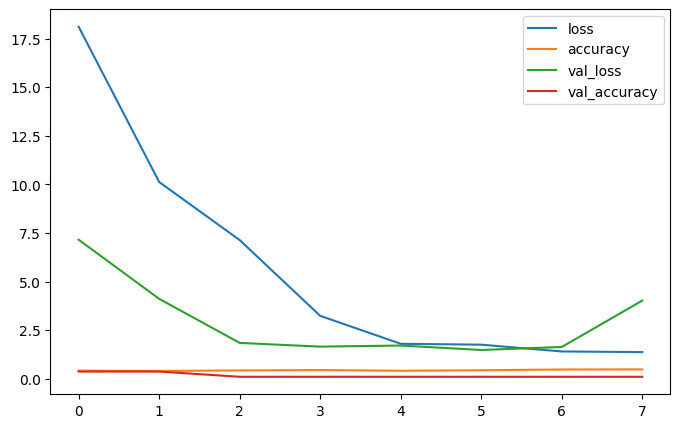

In [80]:
pd.DataFrame(history.history).plot(figsize=(8, 5))                       # Visualization of dataframe
#plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show(); 

In [99]:
y_prediction_neu=model.predict(X_train)
y_prediction_neu
f_1_score_model_neu=f1_score(np.argmax(y_train,axis=1),np.argmax(y_prediction_neu,axis=1),average='macro')
print('f_1_score_train', f_1_score_model_neu)

43/43 [==============================] - 66s 2s/step
f_1_score_train 0.28126003026273555


In [98]:
y_prediction_neu_test=model.predict(X_test)
# y_prediction_neu
f_1_score_model_neu_test=f1_score(np.argmax(y_test,axis=1),np.argmax(y_prediction_neu_test,axis=1),average='macro')
print('f_1_score_test', f_1_score_model_neu_test)

11/11 [==============================] - 18s 2s/step
f_1_score_test 0.2775700754287478


# Getting test files

In [129]:
test_set['path']=str(TEST_PATH)+test_set['example_path']
test_set.head()

,latitude,longitude,year,example_path,path,target
0,0.761681,122.755954,2006,train_test_data/test/69.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
1,-8.059785,113.053791,2007,train_test_data/test/469.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
2,-2.006610,111.746316,2002,train_test_data/test/6.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
3,0.901765,114.042495,2016,train_test_data/test/351.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
4,1.911210,100.829633,2008,train_test_data/test/1001.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0


In [130]:
TEST_PATH

'd:\\Bootcamp_22\\NUWE\\Zero_deforestation_mission\\Data\\'

In [131]:
images=test_set['path'].apply(imread)  

In [132]:
images

0      [[[16, 22, 1], [24, 26, 5], [20, 22, 5], [15, ...
1      [[[21, 33, 9], [21, 32, 10], [26, 36, 14], [32...
2      [[[13, 23, 8], [14, 25, 9], [15, 25, 10], [15,...
3      [[[6, 16, 3], [1, 10, 0], [2, 12, 0], [8, 20, ...
4      [[[31, 39, 27], [31, 37, 25], [28, 35, 22], [2...
                             ...                        
630    [[[36, 45, 26], [36, 45, 25], [36, 43, 23], [3...
631    [[[23, 39, 49], [22, 38, 48], [21, 37, 47], [2...
632    [[[19, 32, 16], [19, 32, 18], [16, 29, 15], [1...
633    [[[21, 36, 16], [23, 39, 18], [22, 38, 16], [2...
634    [[[22, 29, 16], [23, 32, 7], [26, 32, 9], [35,...
Name: path, Length: 635, dtype: object

In [133]:
X=np.array(images.to_list())  

In [134]:
predicciones = model.predict(np.array(images.to_list()))
predicciones_labels = np.argmax(predicciones, axis=1)
predicciones_labels


20/20 [==============================] - 49s 2s/step


array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [135]:
test_set['target']=predicciones_labels
test_set.head()

,latitude,longitude,year,example_path,path,target
0,0.761681,122.755954,2006,train_test_data/test/69.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
1,-8.059785,113.053791,2007,train_test_data/test/469.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
2,-2.006610,111.746316,2002,train_test_data/test/6.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
3,0.901765,114.042495,2016,train_test_data/test/351.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0
4,1.911210,100.829633,2008,train_test_data/test/1001.png,d:\Bootcamp_22\NUWE\Zero_deforestation_mission...,0


In [136]:
submission=pd.DataFrame()
submission['target']=test_set['target']
submission

,target
0,0
1,0
2,0
3,0
4,0
...,...
630,0
631,0
632,0
633,2


In [145]:
submission.to_csv("submission.csv", header = False,index=False)

In [137]:
json_submit=submission.to_json(orient='columns')
json_submit

'{"target":{"0":0,"1":0,"2":0,"3":0,"4":0,"5":2,"6":0,"7":0,"8":0,"9":0,"10":0,"11":2,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":2,"24":0,"25":0,"26":0,"27":0,"28":0,"29":0,"30":0,"31":0,"32":0,"33":0,"34":0,"35":0,"36":0,"37":0,"38":0,"39":0,"40":2,"41":0,"42":0,"43":0,"44":0,"45":0,"46":0,"47":2,"48":0,"49":0,"50":0,"51":2,"52":0,"53":0,"54":0,"55":0,"56":0,"57":0,"58":0,"59":2,"60":0,"61":0,"62":0,"63":0,"64":0,"65":2,"66":2,"67":0,"68":0,"69":0,"70":2,"71":0,"72":2,"73":0,"74":2,"75":2,"76":2,"77":2,"78":0,"79":2,"80":0,"81":0,"82":0,"83":0,"84":0,"85":0,"86":0,"87":0,"88":0,"89":0,"90":0,"91":0,"92":0,"93":0,"94":2,"95":0,"96":0,"97":0,"98":0,"99":0,"100":2,"101":0,"102":2,"103":0,"104":0,"105":2,"106":0,"107":0,"108":0,"109":0,"110":0,"111":2,"112":0,"113":0,"114":0,"115":0,"116":0,"117":2,"118":0,"119":0,"120":0,"121":0,"122":0,"123":0,"124":0,"125":0,"126":0,"127":0,"128":0,"129":0,"130":0,"131":0,"132":2,"133":0,"134":0,"135":0,"136":0,"1

In [139]:

with open('json_submit.json', 'w') as file:
    json.dump(json_submit, file)